In [3]:
from skimage.measure import block_reduce
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class PoolingLayer:
    def __init__(self, kernel_size=2, func=np.max):
        self.kernel_size = kernel_size
        self.func = func
        self.input = self.output = None
        
    def forward(self, img): 
        self.input = img
        self.output = block_reduce(img, (self.kernel_size, self.kernel_size), self.func)
        return self.output
    
    def backprop(self, out_error, lr):
        width, height = self.input.shape
        gradient = np.zeros_like(self.input)
        
        for x in range(0, width, self.kernel_size):
            for y in range(0, height, self.kernel_size):
                kernel = self.input[x: x+self.kernel_size, y: y+self.kernel_size]
                max_x, max_y = np.unravel_index(np.argmax(kernel), kernel.shape)
                
                grad_kernel = np.zeros_like(kernel)
                grad_kernel[max_x, max_y] = 1
                
                gradient[x:x+self.kernel_size, y: y+self.kernel_size] = grad_kernel
        return gradient * out_error

In [18]:
image = Image.open("chad.png")
image = ImageOps.grayscale(image)
image = np.asarray(image)

pool = PoolingLayer()

(256, 222)
(128, 111)


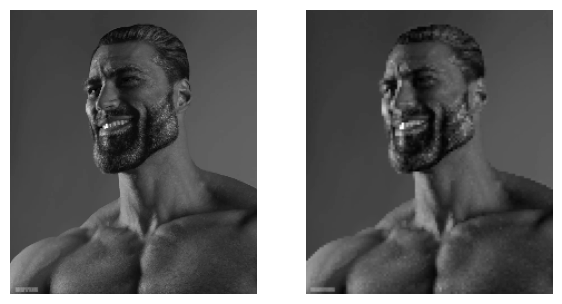

In [21]:
plt.figure(figsize=(7, 5))

# plot image
print(image.shape)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.axis("off")

# pool image
image = pool.forward(image)

# plot new image
print(image.shape)
plt.subplot(1, 2, 2)
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.show()

(256, 222)


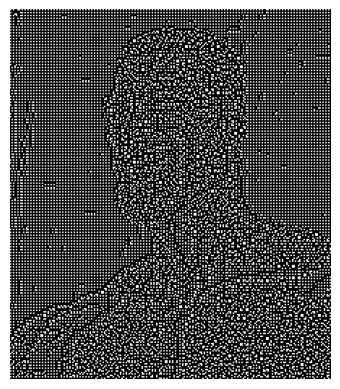

In [22]:
# plot gradients
grad = pool.backprop(1, 0)
print(grad.shape)

plt.imshow(grad, cmap="gray")
plt.axis("off")

plt.show()